# PROJECT 1: Graduate Admission Prediction

### Use classification technique for prediction of Graduate Admissions from an Indian perspective

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("Admission_Predict.csv")

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
dataset.shape

(400, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
corr_mat=dataset.corr()


<Axes: >

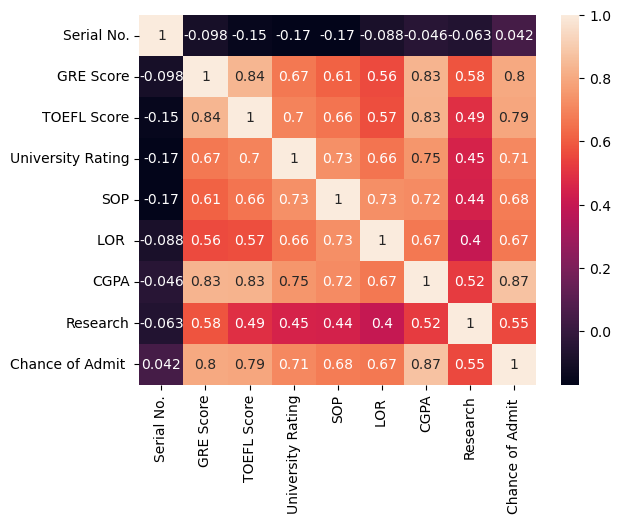

In [9]:
sns.heatmap(data=corr_mat,annot=True)

In [10]:
print(dataset.columns)
import pandas as pd
dataset['Admission_Probability'] = pd.cut(dataset['Chance of Admit '], bins=[0, 0.5, 0.85, 1.0], labels=['LOW', 'MID', 'HIGH'])
print(dataset)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                

In [11]:
dataset.isna().any()

Serial No.               False
GRE Score                False
TOEFL Score              False
University Rating        False
SOP                      False
LOR                      False
CGPA                     False
Research                 False
Chance of Admit          False
Admission_Probability    False
dtype: bool

In [12]:
probab_count=dataset.Admission_Probability.value_counts()
probab_count

MID     282
HIGH     83
LOW      35
Name: Admission_Probability, dtype: int64

<Axes: xlabel='Admission_Probability', ylabel='count'>

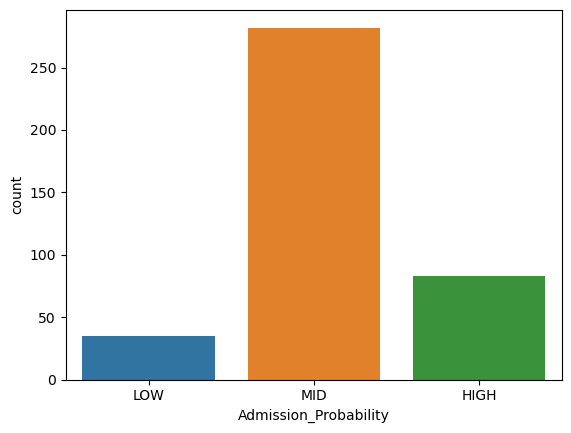

In [13]:
sns.countplot(x='Admission_Probability',data=dataset)

In [14]:
research_count=dataset.Research.value_counts()
research_count

1    219
0    181
Name: Research, dtype: int64

([<matplotlib.patches.Wedge at 0x1e824894d90>,
 [Text(-0.1635397261721476, 1.087775141269343, 'Research Submitted'),
  Text(0.16353972617214768, -1.087775141269343, 'Research Not Submitted')],
 [Text(-0.08920348700298959, 0.5933318952378234, '54.8%'),
  Text(0.08920348700298963, -0.5933318952378234, '45.2%')])

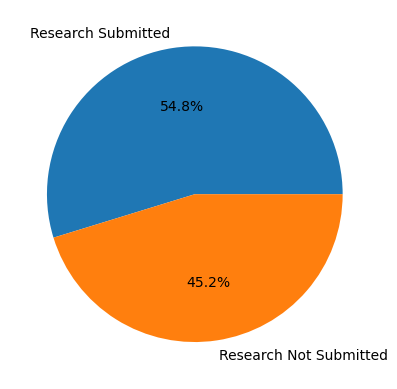

In [15]:
plt.pie(research_count,labels=['Research Submitted','Research Not Submitted'],autopct="%1.1f%%")

<Axes: xlabel='Research', ylabel='count'>

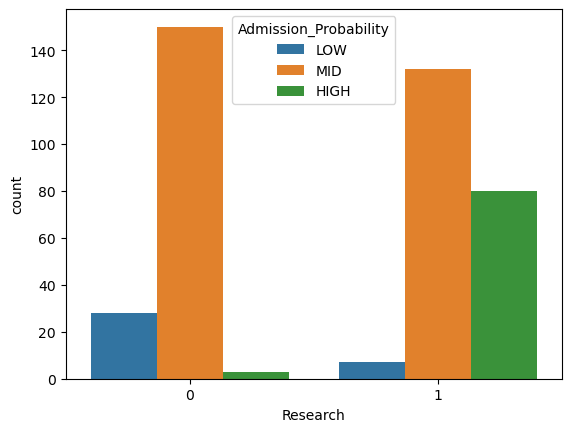

In [16]:
sns.countplot(data=dataset,x='Research',hue='Admission_Probability')

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

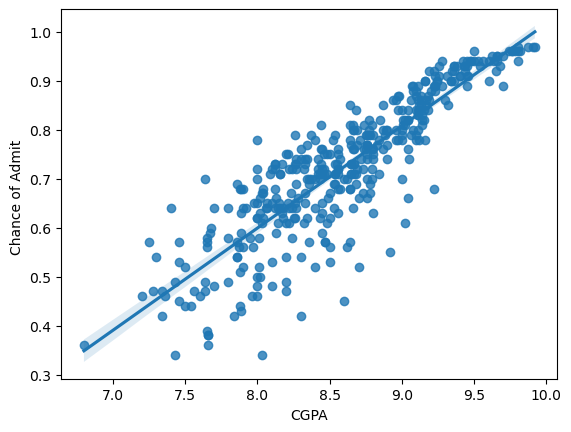

In [17]:
sns.regplot(x='CGPA',y='Chance of Admit ',data=dataset)

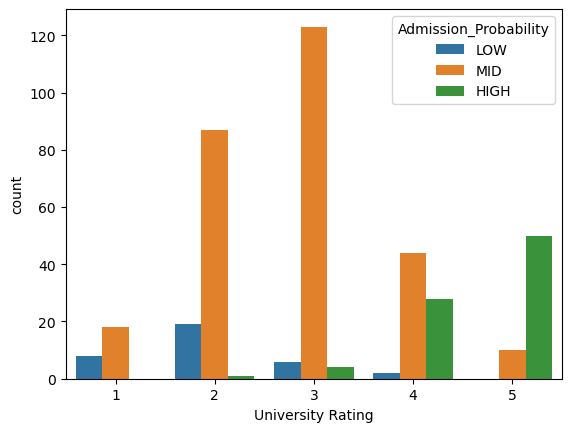

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='University Rating', hue='Admission_Probability', data=dataset)
plt.show()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ',
       'Admission_Probability'],
      dtype='object')


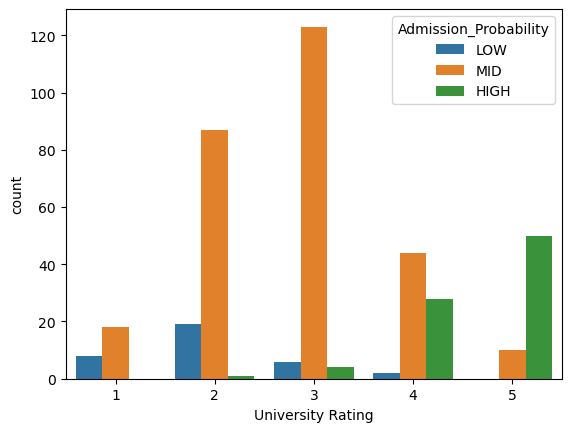

In [19]:
print(dataset.columns)
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'University_Rating' with the actual column name in your dataset
sns.countplot(x='University Rating', hue='Admission_Probability', data=dataset)

# Display the plot
plt.show()


Text(0.5, 1.0, 'Admission Chances by University Rating')

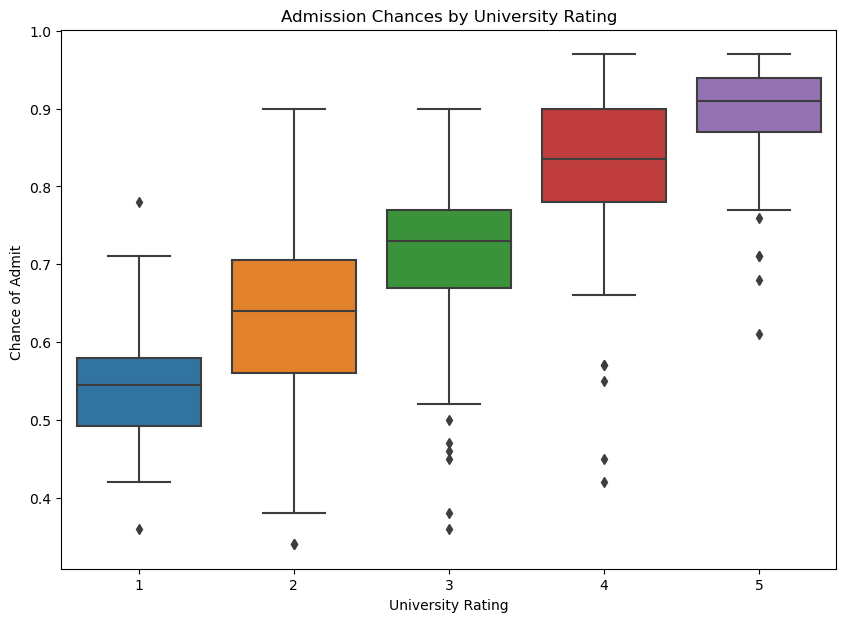

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='University Rating',y='Chance of Admit ',data=dataset)
plt.title("Admission Chances by University Rating")

<Axes: xlabel='TOEFL Score', ylabel='count'>

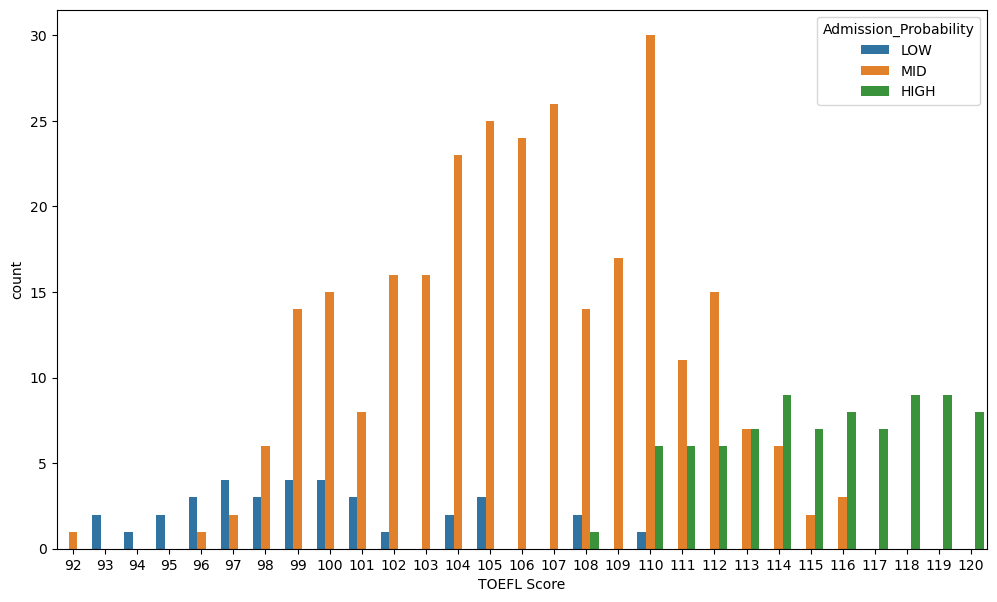

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(x='TOEFL Score',hue='Admission_Probability',data=dataset)

<Axes: xlabel='GRE Score', ylabel='count'>

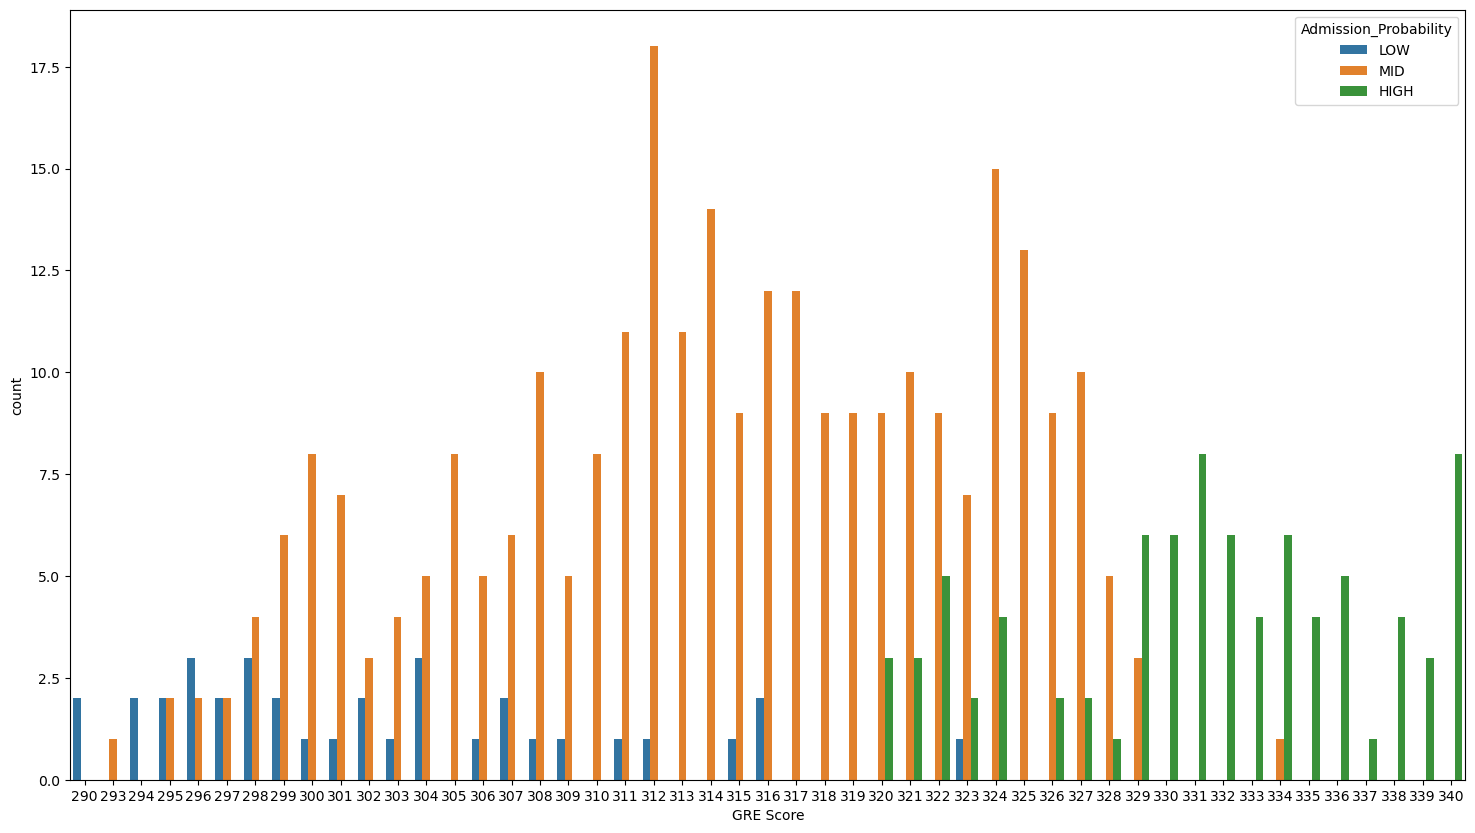

In [22]:
plt.figure(figsize=(18,10))
sns.countplot(x='GRE Score',hue='Admission_Probability',data=dataset)

In [23]:
co_gre=dataset[dataset["GRE Score"]>=320]
co_toefl=dataset[dataset["TOEFL Score"]>=100]

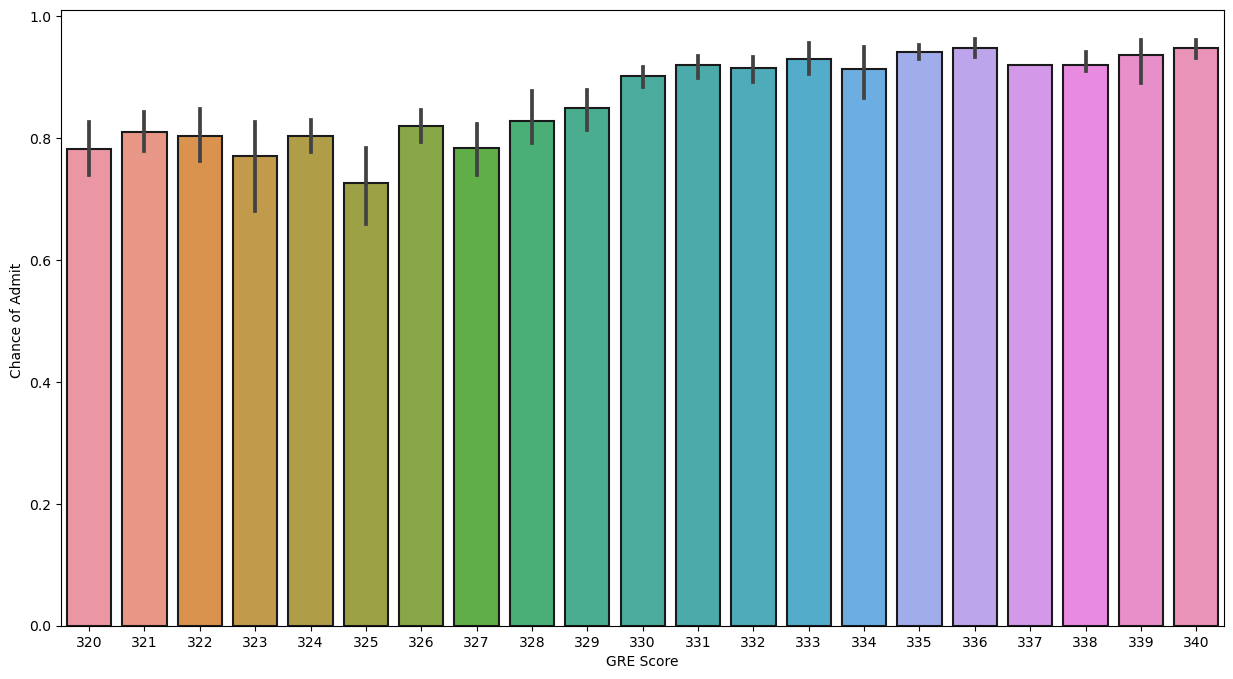

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='GRE Score',y='Chance of Admit ',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

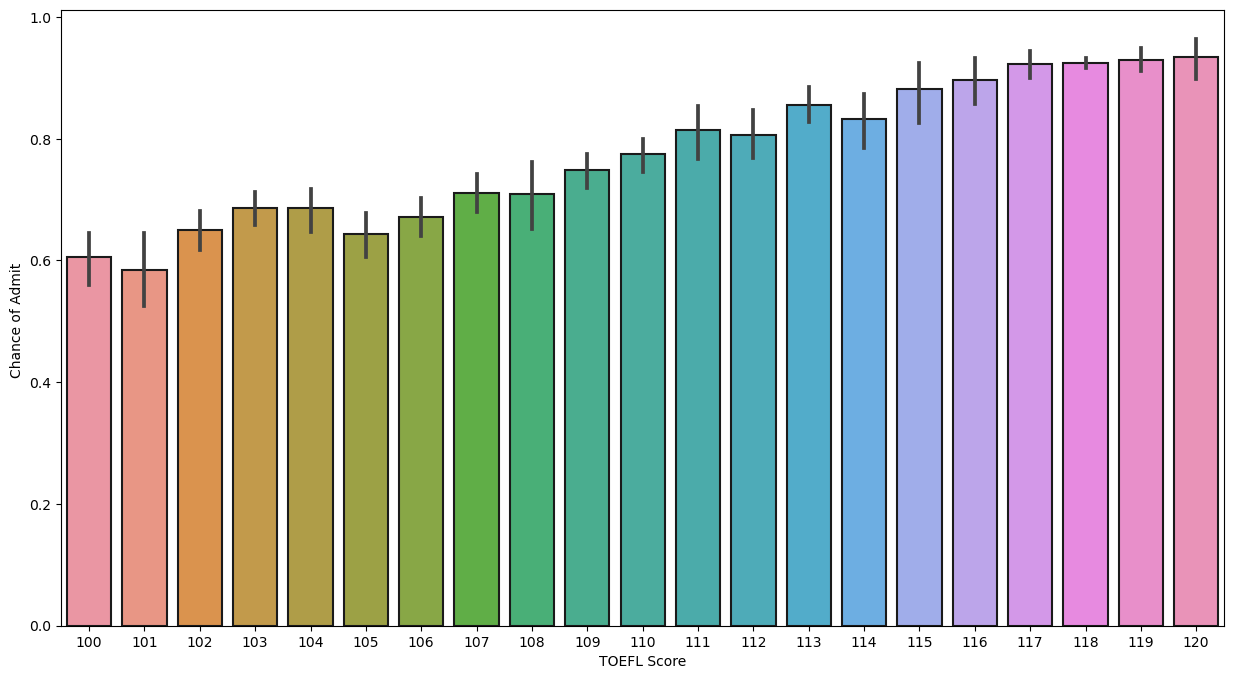

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit ',data=co_toefl, linewidth=1.5,edgecolor="0.1")
plt.show()


In [26]:
value_counts = dataset['SOP'].value_counts()
print(value_counts)

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64


<Axes: xlabel='SOP', ylabel='count'>

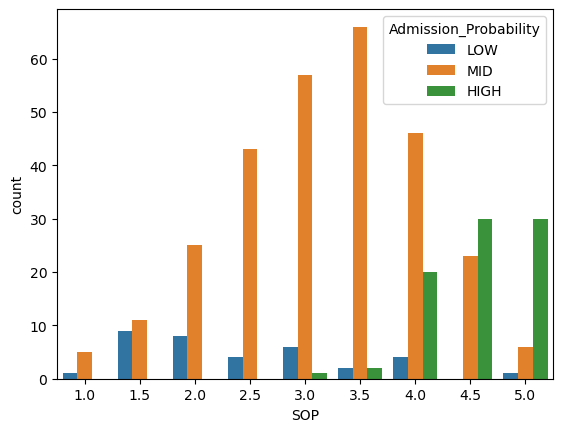

In [27]:
sns.countplot(x="SOP",hue='Admission_Probability',data=dataset)

In [28]:
dataset.isnull().sum()

Serial No.               0
GRE Score                0
TOEFL Score              0
University Rating        0
SOP                      0
LOR                      0
CGPA                     0
Research                 0
Chance of Admit          0
Admission_Probability    0
dtype: int64

In [29]:
dataset.dtypes

Serial No.                  int64
GRE Score                   int64
TOEFL Score                 int64
University Rating           int64
SOP                       float64
LOR                       float64
CGPA                      float64
Research                    int64
Chance of Admit           float64
Admission_Probability    category
dtype: object

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Serial No.             400 non-null    int64   
 1   GRE Score              400 non-null    int64   
 2   TOEFL Score            400 non-null    int64   
 3   University Rating      400 non-null    int64   
 4   SOP                    400 non-null    float64 
 5   LOR                    400 non-null    float64 
 6   CGPA                   400 non-null    float64 
 7   Research               400 non-null    int64   
 8   Chance of Admit        400 non-null    float64 
 9   Admission_Probability  400 non-null    category
dtypes: category(1), float64(4), int64(5)
memory usage: 28.8 KB


In [31]:
dataset.drop(['Serial No.','Admission_Probability'],axis=1,inplace=True)

In [32]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
print(dataset.columns)
x = dataset.drop("Chance of Admit ", axis=1)
y = dataset["Chance of Admit "]

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
y_train_cla = [1 if each > 0.85 else 0 for each in y_train]
y_test_cla = [1 if each > 0.85 else 0 for each in y_test]

In [36]:
lgm=LogisticRegression()

In [37]:
lgm.fit(x_train,y_train_cla)

LogisticRegression()

In [38]:
LogisticRegression()

LogisticRegression()

In [39]:
lgm_pred = lgm.predict(x_test)

In [40]:
print(classification_report(y_test_cla,lgm_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.94      0.76      0.84        21

    accuracy                           0.93        80
   macro avg       0.93      0.87      0.90        80
weighted avg       0.93      0.93      0.92        80



In [41]:
lscore=round(lgm.score(x_train,y_train_cla)*100,2)
print(round(lscore,2,),"%")

93.12 %


In [42]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train_cla)

DecisionTreeClassifier()

In [43]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [44]:
dtc_pred=dtc.predict(x_test)

In [45]:
dscore=round(dtc.score(x_train,y_train_cla)*100,2)
print(round(dscore,2,),"%")

100.0 %


In [46]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train_cla)

RandomForestClassifier()

In [47]:
rfc_pred=rfc.predict(x_test)

In [48]:
print(classification_report(y_test_cla,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.91      0.95      0.93        21

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.96      0.96      0.96        80



In [49]:
rscore=round(rfc.score(x_train,y_train_cla)*100,2)
print(round(rscore,2,),"%")

100.0 %


In [50]:
gnb=GaussianNB()

In [51]:
gnb.fit(x_train,y_train_cla)


GaussianNB()

In [52]:
gnb_pred=gnb.predict(x_test)

In [53]:
print(classification_report(y_test_cla,gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.91      1.00      0.95        21

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [54]:
gscore=round(gnb.score(x_train,y_train_cla)*100,2)
print(round(gscore,2,),"%")

95.62 %


In [55]:
classifier=[]
classifier.append(rscore)
classifier.append(dscore)
classifier.append(lscore)
classifier.append(gscore)
label=['RFC','DTC','LGM','GNB']

Text(0.5, 1.0, 'Accuracy')

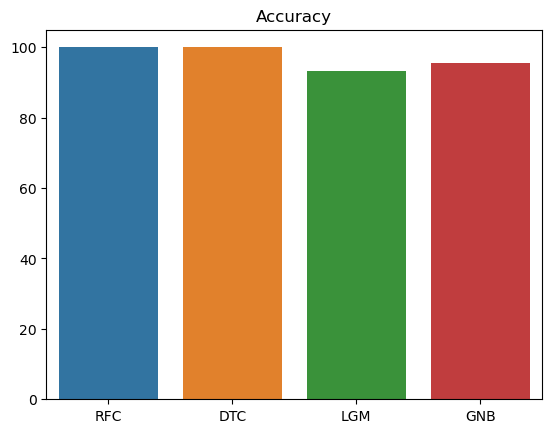

In [56]:
sns.barplot(x=label,y=classifier)
plt.title('Accuracy')

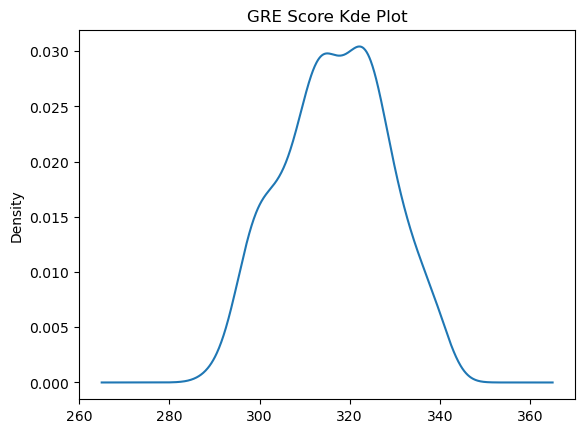

In [57]:
dataset['GRE Score'].plot(kind='kde', title="GRE Score Kde Plot")
plt.show()

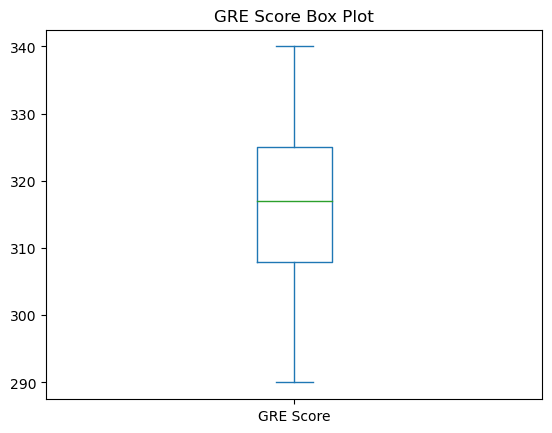

In [58]:
dataset['GRE Score'].plot(kind='box', title="GRE Score Box Plot")
plt.show()

In [59]:
print("Minimum GRE Score : ", dataset['GRE Score'].min())
print("Maximum GRE Score : ", dataset['GRE Score'].max())
print("Average GRE Score : ", dataset['GRE Score'].mean())
print("Std GRE Score : ", dataset['GRE Score'].std())

Minimum GRE Score :  290
Maximum GRE Score :  340
Average GRE Score :  316.8075
Std GRE Score :  11.473646113500477


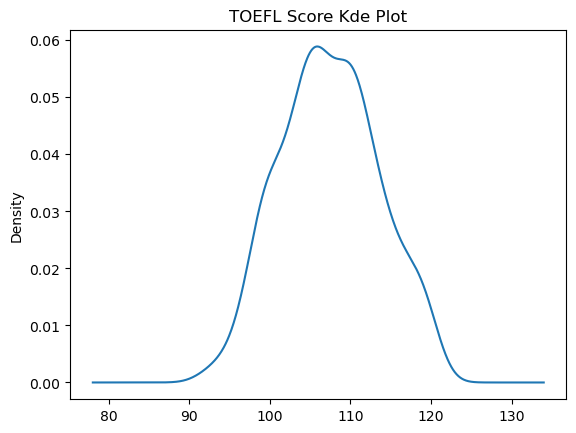

In [60]:
dataset['TOEFL Score'].plot(kind='kde', title="TOEFL Score Kde Plot")
plt.show()

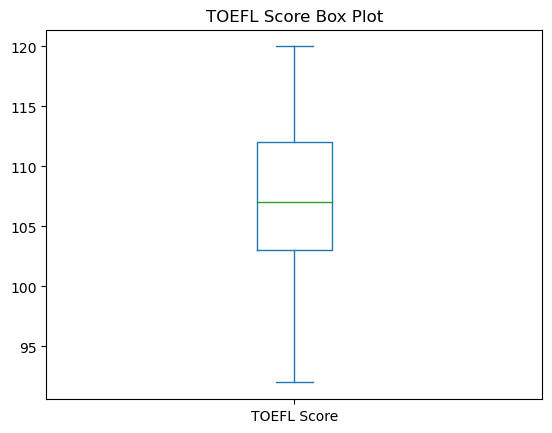

In [61]:
dataset['TOEFL Score'].plot(kind='box', title="TOEFL Score Box Plot")
plt.show()

In [62]:
print("Minimum TOEFL Score : ", dataset['TOEFL Score'].min())
print("Maximum TOEFL Score : ", dataset['TOEFL Score'].max())
print("Average TOEFL Score : ", dataset['TOEFL Score'].mean())
print("Std TOEFL Score : ", dataset['TOEFL Score'].std())

Minimum TOEFL Score :  92
Maximum TOEFL Score :  120
Average TOEFL Score :  107.41
Std TOEFL Score :  6.069513777374129


In [63]:
dataset['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

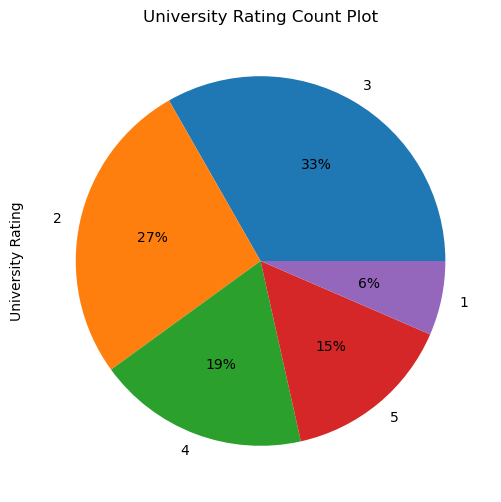

In [64]:
dataset['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating Count Plot")
plt.show()

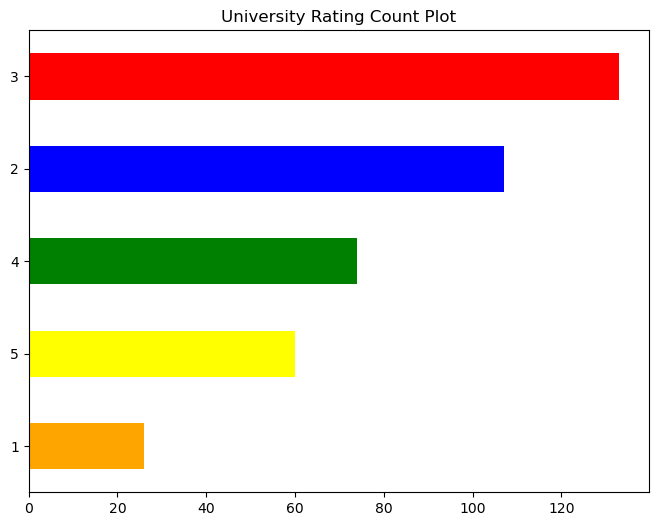

In [65]:
dataset['University Rating'].value_counts().sort_values().plot(kind='barh',figsize=(8,6),
                                            title="University Rating Count Plot",
                                                          color=["orange","yellow","green","blue","red"])
plt.show()

In [66]:
dataset.SOP.value_counts()

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

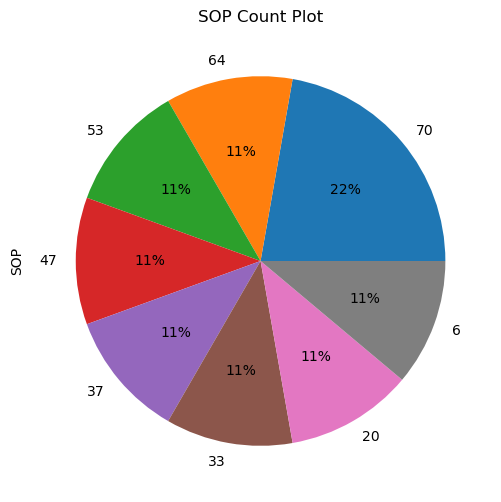

In [67]:
dataset.SOP.value_counts().value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="SOP Count Plot")
plt.show()

In [68]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [69]:
dataset.columns = dataset.columns.str.replace(' ','')

In [70]:
dataset.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit'],
      dtype='object')

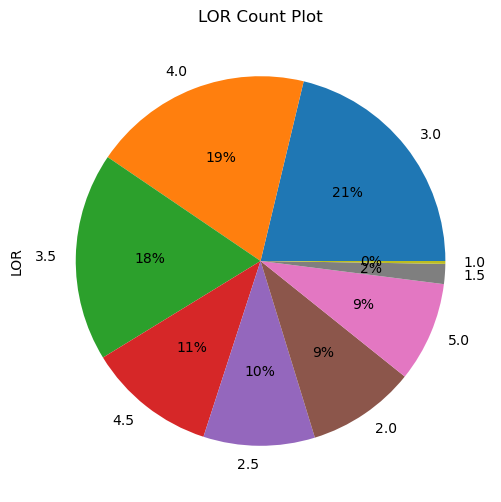

In [71]:
dataset.LOR.value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="LOR Count Plot")
plt.show()

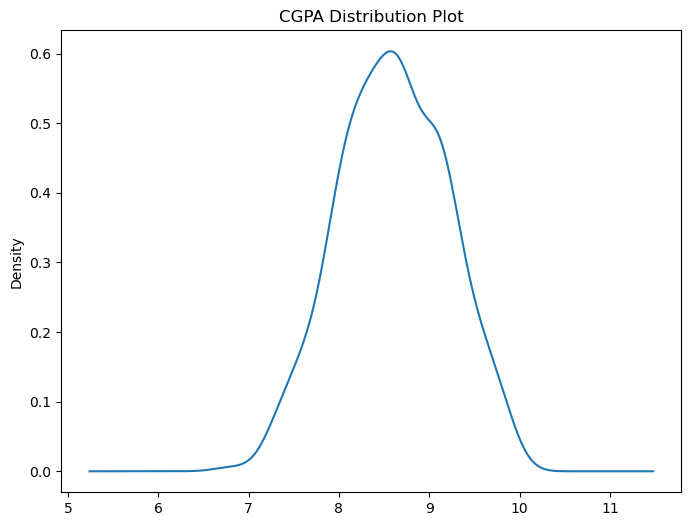

In [72]:
dataset.CGPA.plot(kind="kde", figsize=(8,6), title="CGPA Distribution Plot")
plt.show()

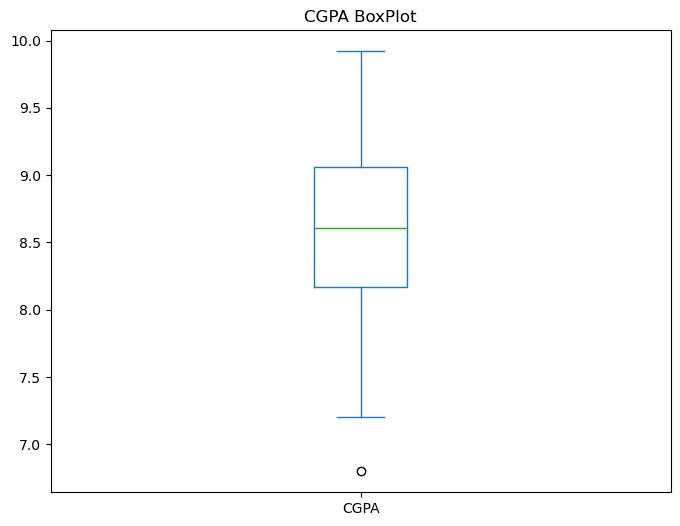

In [73]:
dataset.CGPA.plot(kind="box", figsize=(8,6), title="CGPA BoxPlot")
plt.show()

In [74]:
dataset.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

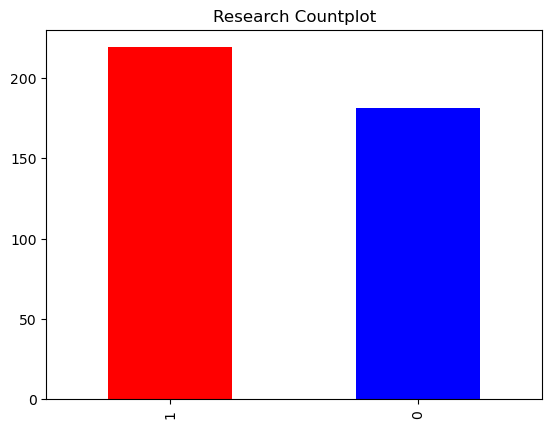

In [75]:
dataset.Research.value_counts().plot(kind='bar',title="Research Countplot",color=["red","blue"])
plt.show()

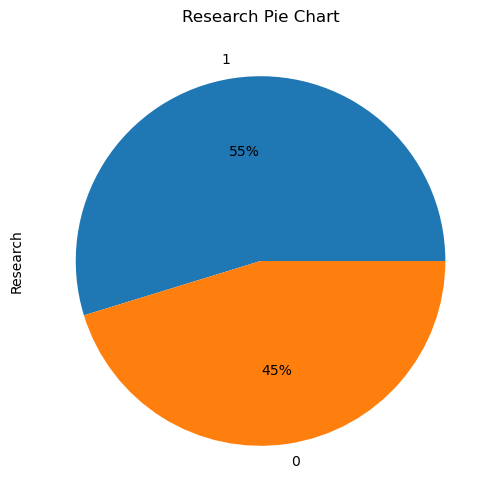

In [76]:
dataset.Research.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(8,6) , title="Research Pie Chart")
plt.show()

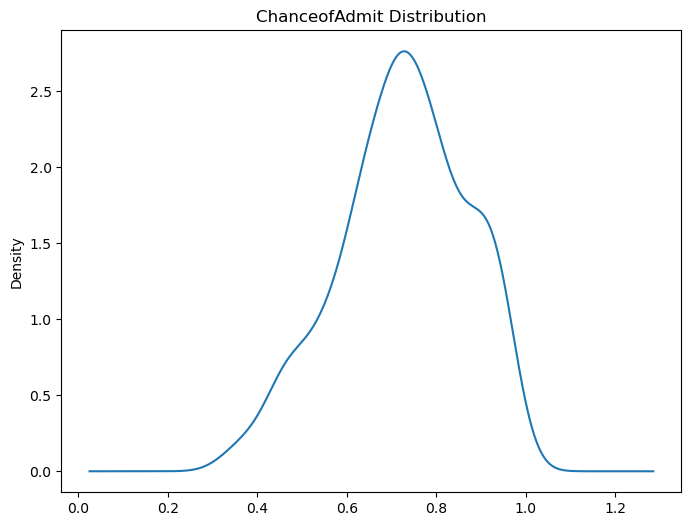

In [77]:
dataset.ChanceofAdmit.plot(kind='kde',figsize=(8,6), title="ChanceofAdmit Distribution")
plt.show()

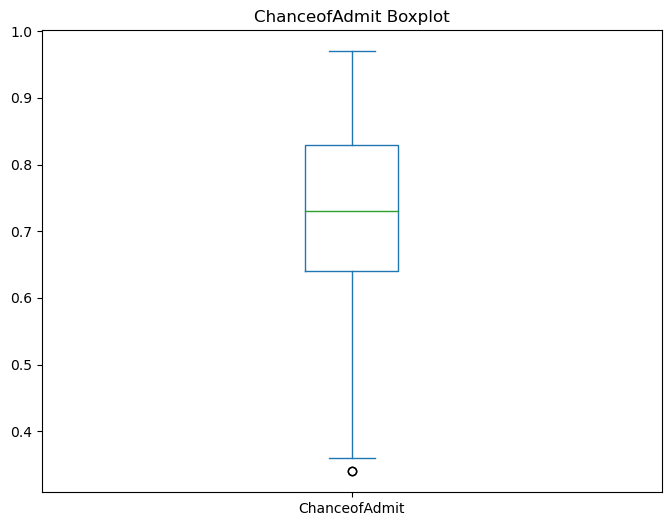

In [78]:
dataset.ChanceofAdmit.plot(kind='box',figsize=(8,6), title="ChanceofAdmit Boxplot")
plt.show()

In [79]:
dataset.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


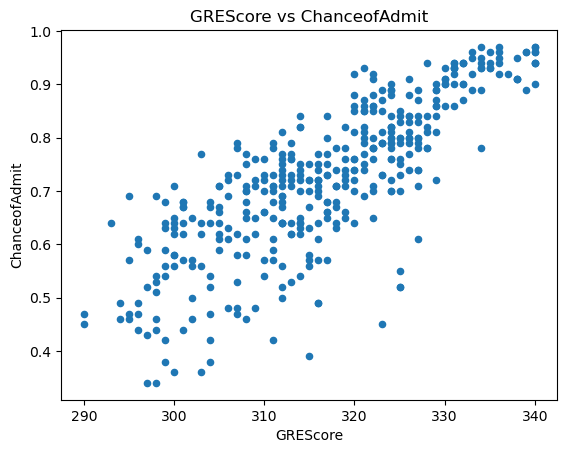

In [80]:
dataset.plot(kind="scatter", x='GREScore', y = 'ChanceofAdmit', title="GREScore vs ChanceofAdmit")
plt.show()

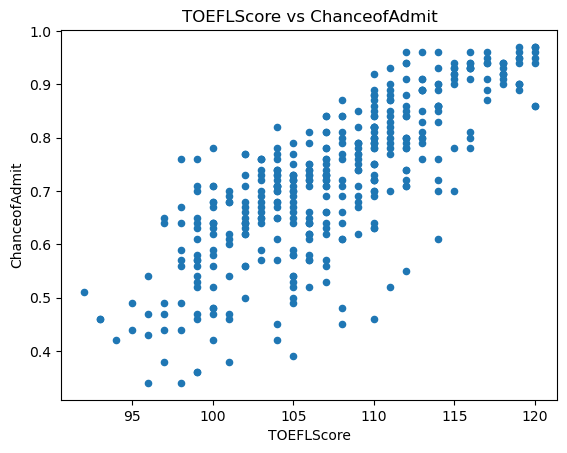

In [81]:
dataset.plot(kind="scatter", x='TOEFLScore', y = 'ChanceofAdmit' , title="TOEFLScore vs ChanceofAdmit")
plt.show()

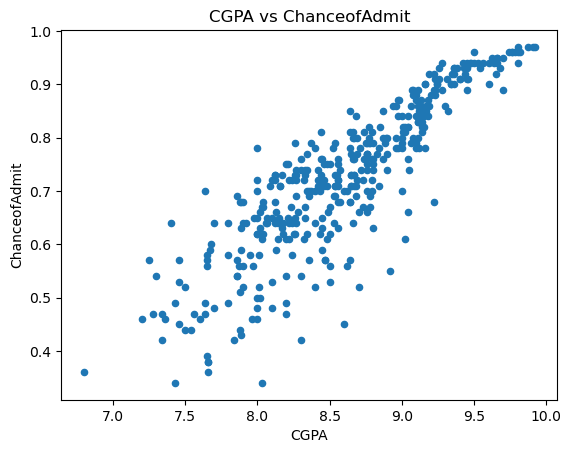

In [82]:
dataset.plot(kind="scatter", x='CGPA', y = 'ChanceofAdmit', title="CGPA vs ChanceofAdmit")
plt.show()

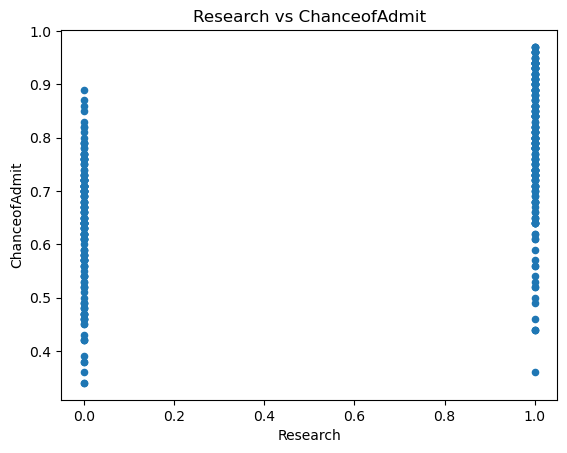

In [83]:
dataset.plot(kind="scatter", x='Research', y = 'ChanceofAdmit', title="Research vs ChanceofAdmit")
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = dataset.iloc[:,:-1]
X

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [86]:
y = dataset.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: ChanceofAdmit, Length: 400, dtype: float64

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [88]:
scaler = StandardScaler()

In [89]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X_train = np.array([[1, 2], [3, 4], [5, 6]])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [90]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

In [91]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X_train = np.array([[1, 2], [3, 4], [5, 6]])
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test = np.array([[7, 8], [9, 10]])
X_test_scaled = scaler.transform(X_test)

In [92]:
X_test = scaler.transform(X_test)
X_test

array([[2.44948974, 2.44948974],
       [3.67423461, 3.67423461]])

In [93]:
import joblib